# Pregunta 1, Tarea 2 - INF-493

(a) Construya un dataframe con los datos a analizar descargando los datos desde la URL. Determine
cuántos registros contiene el conjunto de entrenamiento y cuántos el conjunto de pruebas. Determine
además el número promedio de palabras por ítem en cada clase.

In [1]:
%matplotlib inline

import urllib
import pandas as pd

train_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.test"

train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)

In [2]:
train_df.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [3]:
test_df.tail()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


In [4]:
print "Cantidad de datos del conjunto de entrenamiento:", train_df.y.count()

Cantidad de datos del conjunto de entrenamiento: 528


In [5]:
print "Cantidad de datos del conjunto de pruebas:", test_df.y.count()

Cantidad de datos del conjunto de pruebas: 462


In [6]:
train_df.groupby("y").count()

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
y,,,,,,,,,,
1,48,48,48,48,48,48,48,48,48,48
2,48,48,48,48,48,48,48,48,48,48
3,48,48,48,48,48,48,48,48,48,48
4,48,48,48,48,48,48,48,48,48,48
5,48,48,48,48,48,48,48,48,48,48
6,48,48,48,48,48,48,48,48,48,48
7,48,48,48,48,48,48,48,48,48,48
8,48,48,48,48,48,48,48,48,48,48
9,48,48,48,48,48,48,48,48,48,48


(b) Construya matrices X e y que contengan las características y las etiquetas correspondientes a los datos
de entrenamiento y pruebas. Normalice apropiadamente los datos antes de empezar a trabajar.

In [7]:
from sklearn.preprocessing import StandardScaler

X = train_df.ix[:,'x.1':'x.10'].values
X_test = test_df.ix[:,'x.1':'x.10'].values

y = train_df.ix[:,'y'].values
y_test = test_df.ix[:,'y'].values

X_std_test = StandardScaler().fit_transform(X_test) 
X_std = StandardScaler().fit_transform(X)

(c) Utilizando PCA genere una representación en 2 dimensiones de la data original (10 dimensiones) identificando
cada clase con un color distinto (elija una paleta apropiada).

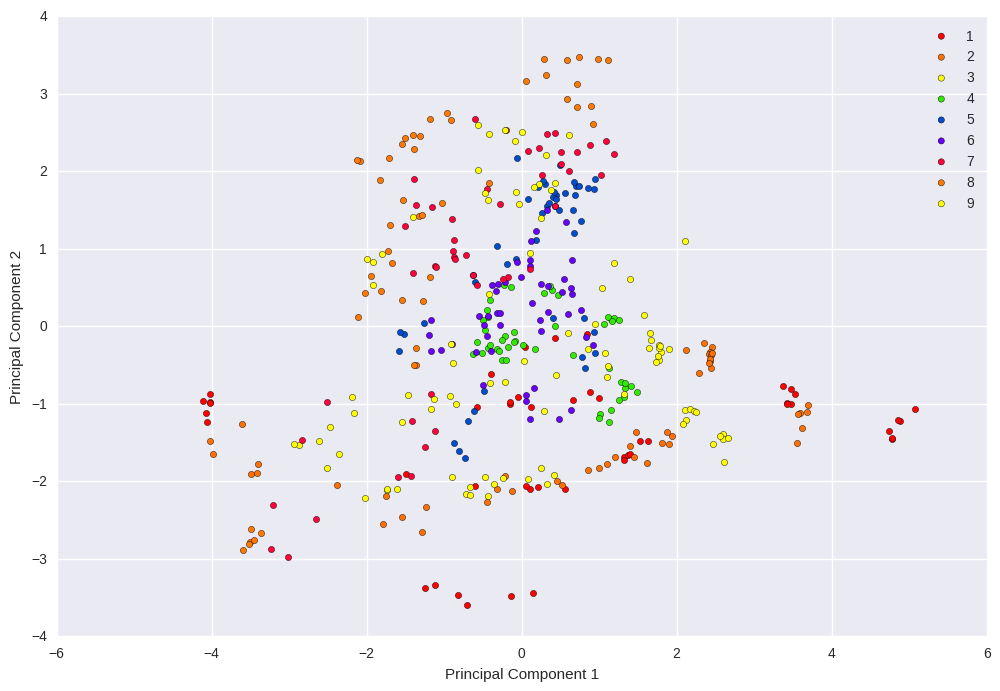

In [8]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)

Xred_pca_test = sklearn_pca.transform(X_std_test)

cmap = plt.cm.get_cmap('prism')
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
plt.figure(figsize=(12, 8))

for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

(d) Utilizando LDA genere una representación en 2 dimensiones de la data original (10 dimensiones) identificando
cada clase con un color distinto (elija una paleta apropiada).

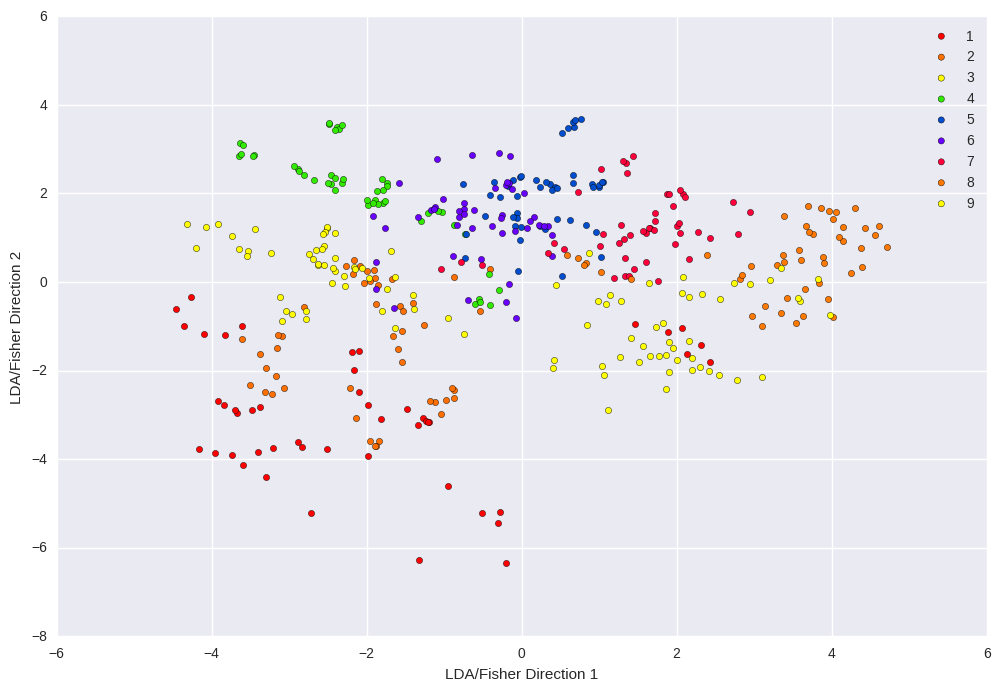

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sklearn_lda = LinearDiscriminantAnalysis(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)

Xred_lda_test = sklearn_lda.transform(X_std_test)

cmap = plt.cm.get_cmap('prism')
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
plt.figure(figsize=(12, 8))

for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,c=col)

plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

(e) Compare cualitativamente los resultados obtenidos en 1 y 2. Proponga un método para elegir una
técnica de reducción de dimensionalidad.

In [10]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression()
logreg.fit(Xred_pca, y)
logreg.score(Xred_pca_test, y_test)

0.25757575757575757

In [11]:
logreg = linear_model.LogisticRegression()
logreg.fit(Xred_lda, y)
logreg.score(Xred_lda_test, y_test)

0.47186147186147187

Se observa tanto en los graficos como al aplicar una regresión logistica a los resultados que la representación en dos dimensiones de LDA logra que los datos obtenidos esten más separados mediante sus clases que PCA.

Lo anterior no quita el enorme aporte de PCA para realizar regresiones. En esta linea seria interesante un metodo para reducir dimensiones pensado en regresión que considere la variable objetivo como lo hace LDA.

(f) Construya un clasificador que determine la clase de un dato x aleatoriamente sin considerar las características
sino que solamente la probabilidad a-priori de cada clase. Por ejemplo, si la clase y = 0 ocurre
el 25% de las veces, su clasificador debe predecir esta clase para un determinado x con probabilidad
0.25, independiente de los atributos de x.

In [12]:
import numpy as np
import random

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

class RandomClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, demo_param='demo'):
        self.demo_param = demo_param

    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y
        
        self.len_data = len(self.y_)
        
        # Return the classifier
        return self

    def predict(self, X):

        # Check is fit had been called
        check_is_fitted(self, ['X_', 'y_'])

        # Input validation
        X = check_array(X)
        
        results = [random.randint(0, self.len_data-1) for x in X]

        return self.y_[results]

model = RandomClassifier()
model.fit(X, y)
model.score(X_test, y_test)

0.093073593073593072

(g) Compare el desempeño de LDA, QDA y un modelo de Vecinos Más Cercanos (k-NN) sin reducir dimensionalidad. ¿Qué técnica se comporta mejor sobre el conjunto de entrenamiento? ¿Sobre el conjunto de pruebas? Describa, utilizando un gráfico, el efecto de cambiar el parámetro de k en el tercer modelo.

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_std,y)

print "LDA en el conjunto de entrenamiento:", lda_model.score(X_std, y)
print "LDA en el conjunto de pruebas:", lda_model.score(X_std_test, y_test)

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_std,y)
print "QDA en el conjunto de entrenamiento:", qda_model.score(X_std, y)
print "QDA en el conjunto de pruebas:", qda_model.score(X_std_test, y_test)


knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_std,y)
print "KNN en el conjunto de entrenamiento:", knn_model.score(X_std, y)
print "KNN en el conjunto de pruebas:", knn_model.score(X_std_test, y_test)

LDA en el conjunto de entrenamiento: 0.683712121212
LDA en el conjunto de pruebas: 0.452380952381
QDA en el conjunto de entrenamiento: 0.988636363636
QDA en el conjunto de pruebas: 0.415584415584
KNN en el conjunto de entrenamiento: 0.931818181818
KNN en el conjunto de pruebas: 0.491341991342


El mejor resultado (0.50) se logra en n_neighbors=8


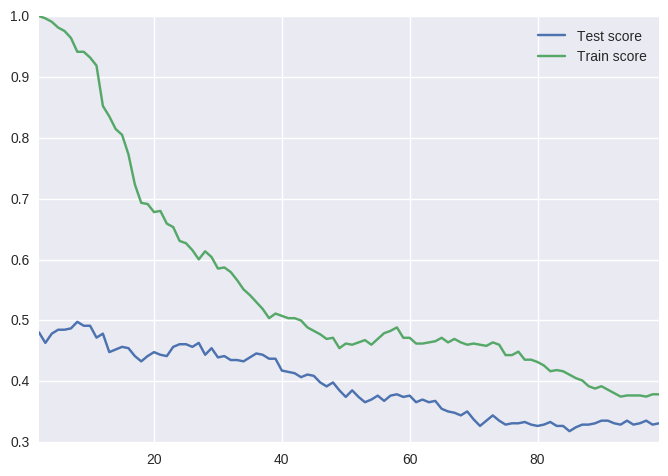

In [14]:
data = []

best_n_neighbors = -1
max_score = -1

for i in range(2,100):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_std,y)
    
    test_score = knn_model.score(X_std_test, y_test)
    
    if test_score > max_score:
        best_n_neighbors = i
        max_score = test_score
    
    data.append({"Train score": knn_model.score(X_std, y), "Test score": test_score})


print "El mejor resultado (%0.2f) se logra en n_neighbors=%d" % (max_score, best_n_neighbors)

data = pd.DataFrame(data)
data = data.set_index([range(2,100)])

data.plot()

(g) Utilice PCA para generar una representación de la data en d' = 1, 2, 3, . . . , 10 dimensiones. Para cada caso entrene un modelo LDA, QDA y de k-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus d'. Sobreponga a este gráfico el error de pruebas versus d'. Concluya.

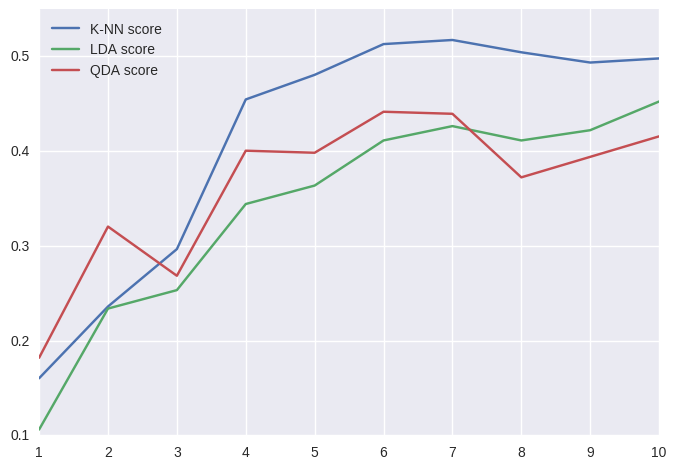

In [15]:
data = []

for i in range(1, 10+1):
    sklearn_pca = PCA(n_components=i)
    Xred_pca = sklearn_pca.fit_transform(X_std)

    Xred_pca_test = sklearn_pca.transform(X_std_test)
    
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(Xred_pca,y)
    
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(Xred_pca,y)

    knn_model = KNeighborsClassifier(n_neighbors=8)
    knn_model.fit(Xred_pca,y)
    
    data.append({"LDA score": lda_model.score(Xred_pca_test, y_test),
                 "QDA score": qda_model.score(Xred_pca_test, y_test),
                 "K-NN score": knn_model.score(Xred_pca_test, y_test)})

data = pd.DataFrame(data)
data = data.set_index([range(1,10+1)])

data.plot()

Se observa que utilizando PCA no mejora la clasificación en los tres algoritmos mayormente, incluso luego de reducir más de 7 dimensiones se observa un abrupto decrimento de la presición de los clasificadores.

(h) Utilice LDA para generar una representación de la data en d' = 1, 2, 3, . . . , 10 dimensiones. Para cada caso entrene un modelo LDA, QDA y de k-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus d'. Sobreponga a este gráfico el error de pruebas versus d'. Concluya.

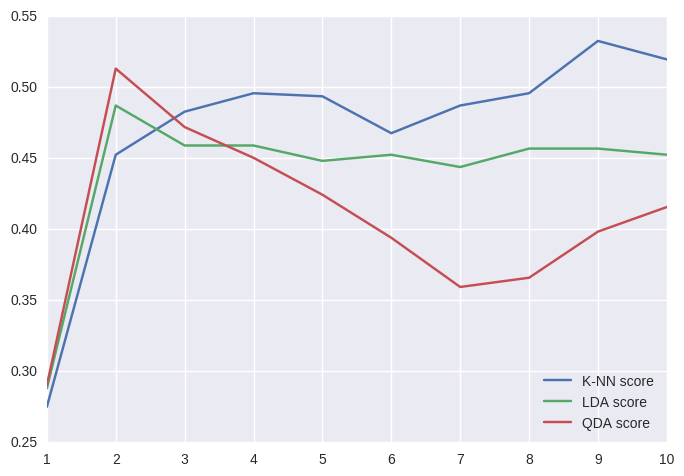

In [16]:
data = []

for i in range(1, 10+1):
    sklearn_lda = LinearDiscriminantAnalysis(n_components=i)
    Xred_lda = sklearn_lda.fit_transform(X_std,y)

    Xred_lda_test = sklearn_lda.transform(X_std_test)

    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(Xred_lda,y)
    
    qda_model = QuadraticDiscriminantAnalysis()
    qda_model.fit(Xred_lda,y)

    knn_model = KNeighborsClassifier(n_neighbors=8)
    knn_model.fit(Xred_lda,y)
    
    data.append({"LDA score": lda_model.score(Xred_lda_test, y_test),
                 "QDA score": qda_model.score(Xred_lda_test, y_test),
                 "K-NN score": knn_model.score(Xred_lda_test, y_test)})

data = pd.DataFrame(data)
data = data.set_index([range(1,10+1)])

data.plot()

A diferencia de PCA, en LDA se observa que tanto los clasificadores LDA y QDA aumentan su precición con reducción de dimensionalidad más agresiva. En el caso de K-NN su mejor resultado se observa en 9 dimensiones pero no quita merito a que es un metodo bastante estable que conserva los datos que conllevan a clasificar.